# Logistic Regression

You will implement logistic regression classifier.

Iris dataset with only 2 classes is provided to test the code.


In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import math
import matplotlib.pyplot as plt


# read dataset
df = pd.read_csv("shuffled_2class_iris_dataset.csv")
print(df.head())

df = df.values
X = df[:,0:4]   # 100x4
y = df[:,4]     # 100x1


   sepal_width  sepal_length  petal_width  petal_length  class
0          5.6           3.0          4.1           1.3      0
1          5.4           3.9          1.7           0.4      1
2          5.6           3.0          4.5           1.5      0
3          5.0           3.5          1.6           0.6      1
4          5.5           2.4          3.7           1.0      0


In [2]:
# Zero out the mean
diff = X.max(0) - X.min(0)
X = X - diff

# Create 90/10 trainig/test sets
tr_data = X[0:90,0:4]; tr_label = y[0:90]
test_data = X[90:100,0:4]; test_label = y[90:100]
np.random.seed(1)

L = len(tr_data)

#add bias:
y = np.ones((L,1))
z = np.ones((len(test_data),1))
tr_data = np.concatenate((y,tr_data), axis = 1)
test_data = np.concatenate((z,test_data), axis = 1)

#tr_label = tr_label.reshape(len(tr_label), 1)
#print(test_data)


### Training

(1500,)


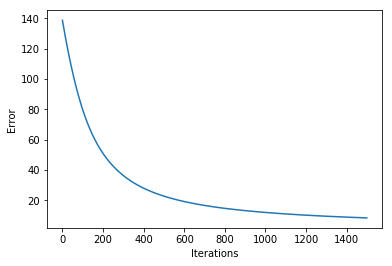

In [3]:
# Train the model using the training data

# Use batch gradient descent to find the optimal weights of the sigmoid function
# Experiment with different learning rates
# Run it for 1500 iterations.  You may change the number of iterations as you see fit.


# Initialization
nu = 0.005
MAX_ITR = 1500 
J = []   # J is the cost function

#initialize w0, w1, w2, w3, w4 randomly
w = np.random.rand(5, 1)

L = len(tr_data)


#print(tr_data)
#print(tr_label)


# TO DO: complete the rest of initialization ...

# Loop for 1500 iterations
for itr in range (0, MAX_ITR):
        
    #2 steps to obtain sumation term:
    #step 1: Get a 90x 1 array containing w^txi for each training data i 
    #step 2: Run through the each w^x temm and put it into the dJ/dw formula to obtain sumation for each w0,w1...w4.  
    
    #step 1:
    W = np.matmul(tr_data, w)
    #print(W)
    
    #step 2:
    sigma0 = []
    sigma1 = []
    sigma2 = []
    sigma3 = []
    sigma4 = []
    tempJ = []
    
    for i in range(0, L):
        sigmoid = (1/(1+math.exp(-W[i])))
        sigma0.append((sigmoid - tr_label[i]) * tr_data[i][0])
        sigma1.append((sigmoid - tr_label[i]) * tr_data[i][1])
        sigma2.append((sigmoid - tr_label[i]) * tr_data[i][2])
        sigma3.append((sigmoid - tr_label[i]) * tr_data[i][3])
        sigma4.append((sigmoid - tr_label[i]) * tr_data[i][4])
        
        #while in this loop, also obtain the each element of tsumation term for cost function using w^tx and add to list tempJ
        tempJ.append(tr_label[i] * math.log(sigmoid) + (1 - tr_label[i]) * (math.log(1-sigmoid)))
    
    
    # no need for temporary variable because the original w0, w1, w2, w3, w4
    # have already been used to computed sigma term
    w[0] = w[0] - (nu/L) * sum(sigma0)
    w[1] = w[1] - (nu/L) * sum(sigma1)
    w[2] = w[2] - (nu/L) * sum(sigma2)
    w[3] = w[3] - (nu/L) * sum(sigma3)
    w[4] = w[4] - (nu/L) * sum(sigma4)
    


    #sum the list of cost function terms, add to J
    J.append(-1*sum(tempJ))


# Plot cost function vs iterations
print(np.shape(J))   # 1500x1
plt.plot(J)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()



### Testing

In [4]:
# Now use the test set to test the model

# Print the actual and predicted class labels
# Print the average accuracy

#create an array W to contain each test datas w^tx for each x in test_data
W = np.matmul(test_data, w)

correct_class_cnt = 0
for i in range (0, len(test_data)):
    

    # TO DO: provide each test data and optimal weights to sigmoid function
    # TO DO: create predicted label based on threshold = 0.5

    #create predicted label y_hat on threshold = 0.5
    if ((1/(1+math.exp(-W[i]))) > .5):
        y_hat = 1
    else: 
        y_hat = 0
        

       
    # Check accuracy
    print('y={}, y_hat={}'.format(test_label[i], y_hat))
    if (y_hat == test_label[i]):
        correct_class_cnt += 1

print('Average accuracy = {0:2f}'.format(correct_class_cnt/10))


y=1.0, y_hat=1
y=1.0, y_hat=1
y=0.0, y_hat=0
y=1.0, y_hat=1
y=0.0, y_hat=0
y=1.0, y_hat=1
y=0.0, y_hat=0
y=0.0, y_hat=0
y=0.0, y_hat=0
y=1.0, y_hat=1
Average accuracy = 1.000000


Caution: accuracy may change drastically because of overfitting (data set too small)